## Исследование данных о российском кинопрокате



**Описание данных**  

Первая таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.  
  
**Содержание столбцов**  

_name — название заведения;  
_address — адрес заведения;  
_category — категория заведения, например «кафе», «пиццерия» или «кофейня»;  
_hours — информация о днях и часах работы;  
_lat — широта географической точки, в которой находится заведение;  
_lng — долгота географической точки, в которой находится заведение;  
_rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);  
_price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;  
_avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона:  
_middle_avg_bill — число с оценкой среднего чека; 
_middle_coffee_cup — число с оценкой одной чашки капучино;  
_chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;  
_district — административный район, в котором находится заведение, например Центральный административный округ;  
_seats — количество посадочных мест.  
  

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:,.1f}'.format

Импортируем необходимые библиотеки

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
display(movies.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Загрузим файл и посмотрим что в нём содержится 

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Изучим общую информацию о файле

In [4]:
df_box_office = pd.read_csv('/datasets/mkrf_shows.csv')
display(df_box_office.head())

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


Загрузим второй файл и посмотрим на данные

In [5]:
df_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Изучим общую информацию из второго файла

In [6]:
movies['puNumber'] = movies['puNumber'].str.replace('нет', '0').astype('int')

Заменим значение "нет" на "0" и изменим тип данных на числовой

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Проверим внесенные изменения

In [8]:
data = movies.merge(df_box_office, on='puNumber', how='left')

Объединим наши таблицы

In [9]:
display(data.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.0"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Изучим нашу объединенную таблицу 

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Проверим не потеряли ли мы данные при объединении таблиц

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изучим общую информацию и типы данных столбцов

In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Изменим тип данных столбца с датой начала проката

In [13]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [14]:
def categorize_age(row):
    try:
        if '18+' in row:
            return '18+'
        elif '16+' in row:
            return '16+'
        elif '12+' in row:
            return '12+'
        elif '6+' in row:
            return '6+'
        elif '0+' in row:
            return '0+'
    except:
        return ''

Для удобства преобразуем столбец с возрастным ограничением фильмов, для этого напишем функцию

In [15]:
data['age_restriction'] = data['age_restriction'].apply(categorize_age)

Применим функцию к столбцу

In [16]:
data['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

Проверим получилось ли у нас преобразовать данные

In [17]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Изучим уникальные данные столбца "ratings"

In [18]:
data['ratings'] = data['ratings'].str.replace('%', '').astype('float')

Изменим тип данных в столбце с рейтингом фильма, для этого сначала избавимся от символов

In [19]:
data.loc[data['ratings'] > 10, 'ratings'] /= 10

Теперь преобразуем значения больше 10 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Проверим внесенные изменения

In [21]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Проверим внесенные изменения

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [22]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Изучим количество пропусков в столбцах

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [23]:
dup_rows = data[data.duplicated()]
display(dup_rows)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [24]:
data['title'].duplicated().sum()

714

Проверим какое количество дубликатов встречается в этом столбце

In [25]:
data['title'].value_counts()

День святого Валентина_                   5
Лузеры                                    4
Непокоренный.                             4
Секс в большом городе 2                   4
Двойной копец                             4
                                         ..
Джек Райан: Теория хаоса                  1
Звёздные войны. Эпизод 3: Месть ситхов    1
МУЛЬТ в кино. Выпуск № 5                  1
Красная черепаха                          1
Прометей.                                 1
Name: title, Length: 6772, dtype: int64

Посчитаем количество повторяющихся строк с этими фильмами. У одного фильма, может быть несколько прокатных удостоверений, поэтому повторы возможны, но тогда номера удостоверений у них будут разные. Проверим это ниже.

In [26]:
data['puNumber'].duplicated().sum()

2

Дублей в столбце с номером прокатного удостоверения всего два, а значит повторения фильмов в наших данных связаны с несколькими прокатными удостоверениями.

In [27]:
data = data.drop_duplicates(subset=['puNumber'], keep='first')

Удалим дубль

In [28]:
data[['film_studio', 'production_country', 'director', 'producer', 'genres', 
      'financing_source', 'ratings']] = data[['film_studio', 'production_country', 
    'director', 'producer', 'genres', 'financing_source', 'ratings']].fillna('unknown')

Столбцы с типом object требуют точной замены, мы её знать не можем, поэтому заполним значениями unknown

In [29]:
data[['refundable_support', 'nonrefundable_support', 'budget', 
      'box_office']] = data[['refundable_support', 'nonrefundable_support', 'budget', 
                             'box_office']].fillna(0)

Для столбцов с числовыми значениями заменим все пропуски на 0

In [30]:
data.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Проверим наши преобразования

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [31]:
data['type'] = data['type'].str.strip()

Уберем пробелы из столбца с типом фильма

In [32]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Проверим преобразования

In [33]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

Проверим значения в столбце с названиями киностудий

In [34]:
data['film_studio'] = data['film_studio'].str.strip()

В некоторых названиях встречаются двойные пробелы, удалим их

In [35]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Проверим значения в столбце с указание стран производителей 

In [36]:
data['production_country'] = data['production_country'].str.strip()

Удалим встречающиеся подряд пробелы

In [37]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

Посмотрим на значения в столбце фио режиссера, тут проблем с данными нет

In [38]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Посмотрим на значения в столбце фио продюсера, тут проблем с данными нет, оставляем как есть

In [39]:
data['financing_source'].unique()

array(['unknown', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Посмотрим на значения в столбце с источником финансирования, тут проблем с данными нет

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [40]:
display(data.query('budget < refundable_support + nonrefundable_support'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"комедия,драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"комедия,мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"комедия,мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,"250,000,000.0",0.0,Фонд кино,5.6,фантастика,"1,038,321,489.0"


Сумма столбца с возвртаными и невозвратными средствами поддержки должна быть меньше общего бюджета фильмов, проверим во всех ли строках значения соответсвуют этому

In [41]:
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

Создадим столбец с общей суммой поддержки

In [42]:
for i in data['budget']:
    data.loc[data['total_support'] < i, 'budget'] = data['total_support']

Заполним столбцы с нулевыми значениями в графе бюджет известной суммой поддержки от государства

In [43]:
display(data.query('title == "14+"'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_support
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,"23,000,000.0","23,000,000.0","Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1","23,000,000.0"


Проверим получилось ли это сделать, выбрав одну из строчек, в которой прежде был указан нулевой бюджет

In [44]:
data['refundable_support'].unique()

array([0.000000e+00, 5.000000e+07, 2.600000e+07, 3.000000e+07,
       1.500000e+07, 1.000000e+07, 2.000000e+07, 7.153119e+06,
       2.500000e+07, 4.000000e+07, 6.000000e+07, 4.400000e+07,
       2.900000e+07, 4.100000e+07, 3.600000e+07, 3.500000e+06,
       5.000000e+06, 1.900000e+07, 9.000000e+06, 1.100000e+08,
       1.700000e+07, 7.500000e+07, 1.500000e+08, 3.800000e+07,
       1.000000e+08, 5.500000e+07, 7.000000e+06, 7.346881e+06,
       8.000000e+06, 1.150000e+08, 3.500000e+07, 1.800000e+08,
       2.800000e+07, 8.000000e+07])

Рассмотрим данные в столбце с возвратными средствами. Неожиданных значений нет

In [45]:
data['nonrefundable_support'].unique()

array([0.00000000e+00, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07, 3.00000000e+07, 4.00000000e+07,
       2.30000000e+07, 4.50000000e+07, 5.65790550e+07, 2.55000000e+07,
       2.75100000e+07, 1.00000000e+07, 2.40000000e+07, 2.45000000e+07,
       2.70000000e+07, 5.00000000e+06, 9.00000000e+07, 2.00000000e+07,
       7.00000000e+07, 9.70000000e+07, 2.44500000e+07, 5.00000000e+07,
       6.00000000e+07, 2.75000000e+07, 2.69500000e+07, 1.10000000e+08,
       1.50000000e+07, 5.90000000e+07, 2.50000000e+08, 3.70000000e+07,
       3.50000000e+07, 2.01452850e+07, 2.59000000e+07, 6.00000000e+06,
       3.92104482e+08, 2.52000000e+07, 2.29040000e+07, 2.90000000e+07,
       5.10000000e+07, 4.70000000e+06, 5.30000000e+06, 2.17000000e+07,
       2.49860000e+07, 2.53450000e+07, 1.33000000e+08, 1.75000000e+08,
       3.01239150e+07, 2.85000000e+07, 3.00000000e+08, 4.15000000e+07,
      

Рассмотрим данные в столбце с невозвратными средствами. Подозрительных значений нет

Данные в столбце с рейтингом и кассовым сбором мы уже правили и неожиданных значений в них не было, поэтому их не трогаем.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [46]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

Создадим столбец с годом проката

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [47]:
def test_x(name):
    return name.str.split(',').str[0]

Напишем функцию для заполнения значений новых столбцов

In [48]:
data[['main_director', 'genre']] = data[['director', 'genres']].apply(test_x)

Заполним новые столбцы с фио главного режиссера и жанром фильма с помощью функции

In [49]:
display(data.head(20))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_support,year,main_director,genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.0,0.0,0.0,unknown,7.2,"боевик,драма,мелодрама",0.0,0.0,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6+,0.0,0.0,0.0,unknown,6.6,"драма,военный",0.0,0.0,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,0.0,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,0.0,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,0.0,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,6+,0.0,0.0,0.0,unknown,7.7,драма,0.0,0.0,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12+,0.0,0.0,0.0,unknown,8.3,"мелодрама,комедия","2,700.0",0.0,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",18+,0.0,0.0,0.0,unknown,6.6,"мюзикл,мелодрама,комедия",0.0,0.0,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,18+,0.0,0.0,0.0,unknown,8.0,"комедия,криминал",0.0,0.0,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,12+,0.0,0.0,0.0,unknown,7.8,"мелодрама,комедия",0.0,0.0,2014,В.Титов,мелодрама


Выведем таблицу

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [50]:
data['proportion_of_support'] = data['budget'] / data['total_support']

Посчитаем какую долю от общего бюджета фильма составляет государственная поддержка

### Шаг 3. Проведите исследовательский анализ данных


Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [51]:
numb_of_distribution = data.query('box_office != 0')

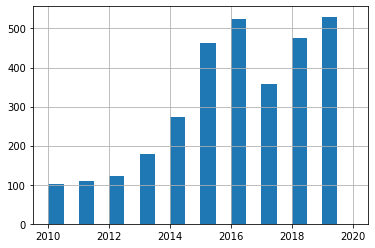

In [52]:
numb_of_distribution['year'].hist(bins=20, range=(2010, 2020));

Построим гистограмму  
Из неё видим, что количество фильмов в прокате увеличивается с 2010 года. По нашим данным в 2010-2011 годах в прокате было около 100 фильмов ежегодно, в 2012 увиичлось примерно на 20. В 2013-2014 годах было 180 и 280 соответственно. В 2015 наблюдается резкий скачок и уже 470 фильмов в год, в 2016 число достигло 520 фильмов. В 2017 году наблюдается пад и фильмов в прокат выходило всего 460. Но уже в 2018 году показатель снова был 490, в 2019-2020 - 520 фильмов.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

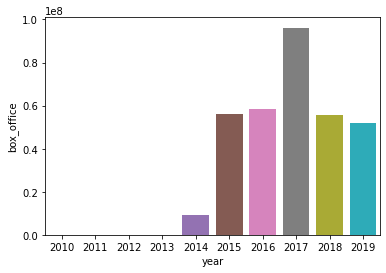

In [53]:
sns.barplot(x='year', y='box_office', data=data, ci= None);

На графике мы видим, что:  
с 2010 по 2013 год сборов не было;  
в 2014 году видим показатели сборов на уровне 0.1;  
в 2015 и 2016 годах почти одинаковые показатели 0.6;  
в 2017 году сборы достигли 0.9;  
в 2018 вернулись на уровень 0.6;  
и в 2019 году показали результат около 0.5.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [54]:
display(data.pivot_table(
               index='year',
               values=['box_office'],
               aggfunc=['mean', 'median']))

,mean,median
,box_office,box_office
year,,
2010,"2,470.7",0.0
2011,"22,673.3",0.0
2012,"11,729.2",0.0
2013,"47,301.1",0.0
2014,"9,225,467.0",0.0
2015,"56,024,631.5","739,938.0"
2016,"58,516,258.9","479,832.5"
2017,"96,165,756.9","2,522,174.0"


Считаем среднюю и медианную сумму сборов для каждого года  
Как и на графике, видим что в период с 2010 по 2014 медианных значений нет, а значит в наших данных есть только один фильм из этого промежутка с указанными сборами. Интересно, что медиана больше за 2017 год, а не за 2019. Хотя на нашем графике очевидно, что максимальное значение было достигнуто именно в 2019 году. Это можно объяснить количеством выпущенных в прокат фильмов в 2017 году, нежели в 2019.

<AxesSubplot:xlabel='age_restriction'>

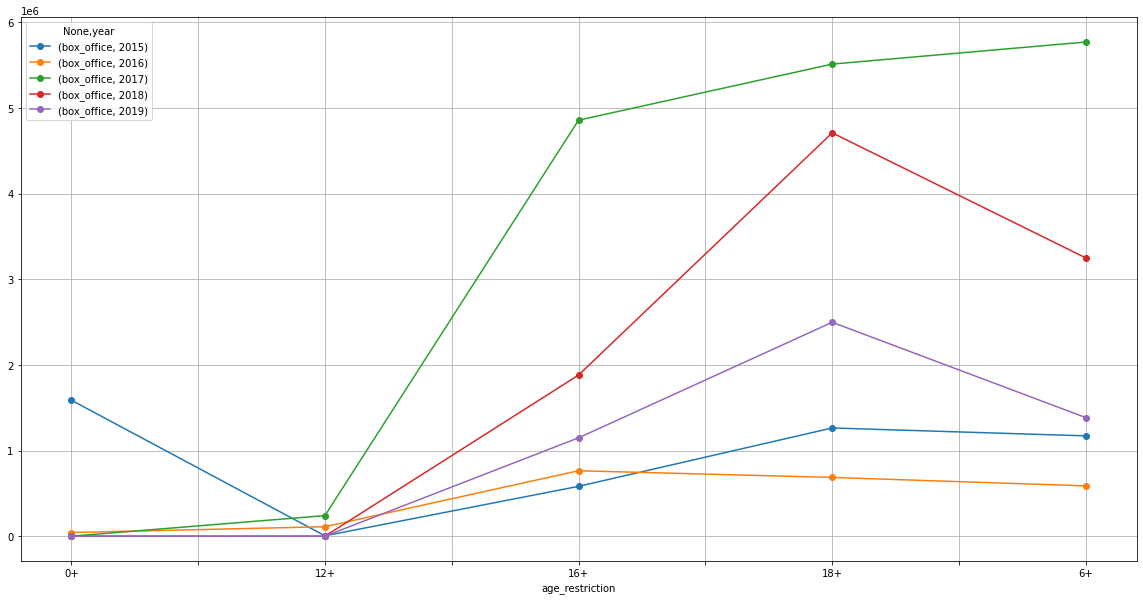

In [55]:
display(data
      .query('year >= 2015')
      .pivot_table(index='age_restriction',columns=['year'],values=['box_office'],aggfunc='median')
      .plot(style='o-', grid=True, figsize=(20, 10)))

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Для определения влияния возрастных ограничений на сборы, построим график с медианными значениями.  
На графике мы видим, что фильмы с разными возрастными ограничениями собирают разные суммы и отличаются от года к году.  
"0+" фильмы собирал кассу только в 2015 году. Возможно, что просто по другим годам у нас нет даных.  
"6+" фильмы собирали в 2015 и 2019 годах примерно одинаковое количество денег, на уровне 1,5. В 2016 собрал 0,6, в 2018 - 3,2, и максимальное значение по всем годам и возрастным рарядом собрал в 2017 году, достигнув результата - 5,8.  
"12+" фильмы в 2015,2018 и 2019 годах не собрали ничего. В 2016 и 2017 - 0,1 и 0,2 соотвветсвенно.  
"16+" в 2015-2016 годах собирал примерно одинаково - 0,7. В 2019 - 1,1, в 2018 - 1,9, в 2017 - 4,9.  
"18+" в 2016г  собрали 0,8, в 2015 - 1,2, в 2019 - 2,5, 2018г - 4,8, в 2017 - 5,6.  
Исходя из наших данных, мы видим что больше всего собирают две категории фильмов "6+" и "18+". Предположу что в первом случае это связано с тем, что на фильмы "6+" ходят чаще всего всей семьей, а значит и билетов на такие фильмы продаётся больше. Но вероятно что в этой возрастной категории выходит не так много фильмов, соответственно и сборов не всегда много. В категории "18+" выходит больше фильмов, поэтому мы видим средние и максимальные значения в этой категории по году. Также можем утверждать, что для кинотеатров наиболее удачным годом по сборам был 2017, так как максимальные значения по трём категориям из пяти зафиксированы именно в этот год.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [56]:
df_corr = data[['type', 'film_studio', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'ratings', 'box_office']]

Соберем интересующие нас столбцы в отдельную таблицу

In [57]:
df_corr.corr()

,refundable_support,nonrefundable_support,budget,box_office
refundable_support,1.0,0.5,0.7,0.2
nonrefundable_support,0.5,1.0,1.0,0.2
budget,0.7,1.0,1.0,0.2
box_office,0.2,0.2,0.2,1.0


Выведем корреляцию между нашими столбцами  
Видим, что есть высокая корреляция между возвратными и невозвратными средствами по отношению к общему бюджету.  
Изучим подробнее на графиках

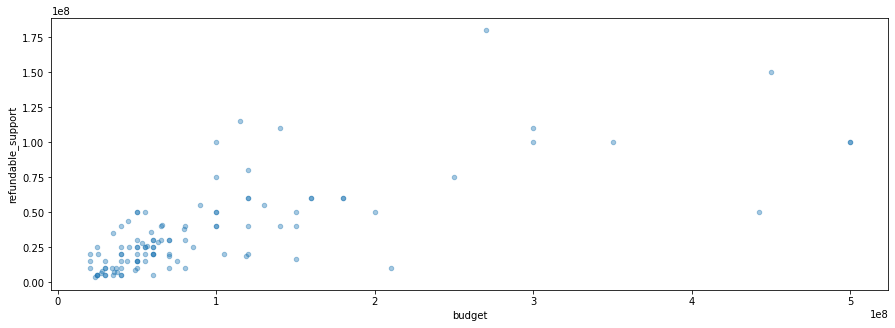

In [58]:
df_ref_supp = data.query('refundable_support > 0')
df_ref_supp.plot(x='budget', y='refundable_support', kind='scatter', alpha=0.4, figsize=(15, 5));

Действительно, видим что с увеличением бюджета увеличивается и количество выданных возвратных средств от государства.

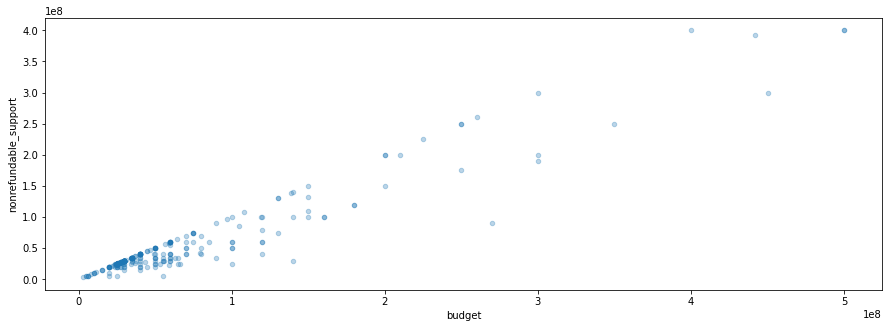

In [59]:
df_nonref_supp = data.query('nonrefundable_support >0')
df_nonref_supp.plot(x='budget', y='nonrefundable_support', kind='scatter', alpha=0.3, figsize=(15, 5));

На этом графике заметна ещё большая связь. Чем больше бюджет, тем больше и сумма невозвратных средств.

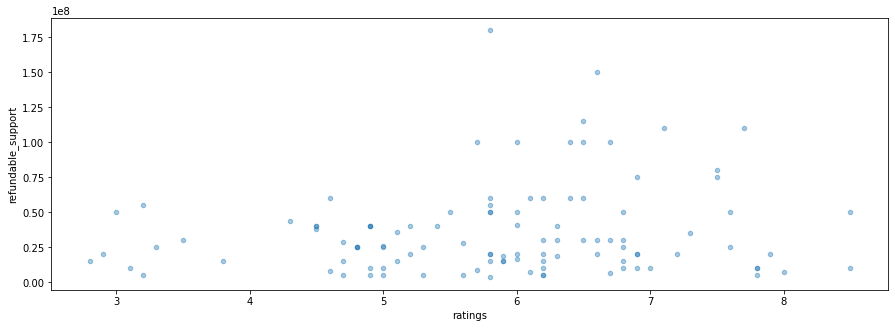

In [60]:
df_ref_supp.query('ratings != "unknown"').plot(x='ratings', y='refundable_support', 
                                               kind='scatter', alpha=0.4, figsize=(15, 5));

Проверим, есть ли связь между рейтингом и количеством выделяем возвратных средств.  
На графике видим, что с увеличением средств, рейтинг не увеличивается. Есть много значений с небольшой поддержкой, но высоким рейтингом. Точно так же есть много значений с большой поддержкой, но средним рейтингом в районе 5-6.

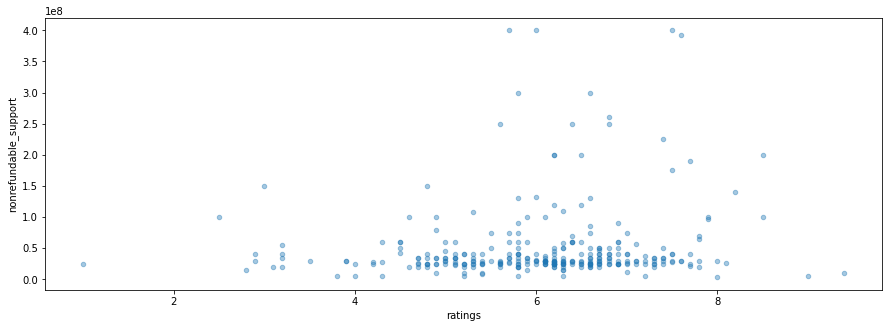

In [61]:
df_nonref_supp.query('ratings != "unknown"').plot(x='ratings', y='nonrefundable_support', 
                                                  kind='scatter', alpha=0.4, figsize=(15, 5));

Проверяем есть ли зависимость рейтинга от количества выделяем невозвратных средств.  
Видим, что зависимости нет. С разной поддержкой, большинство фильмов лежат в диапозоне рейтинга 5-7. И парочка значений с небольшой поддержкой имеют оценку 8.7, что говорит об отсутсвии какой-либо связи этих двух факторов.

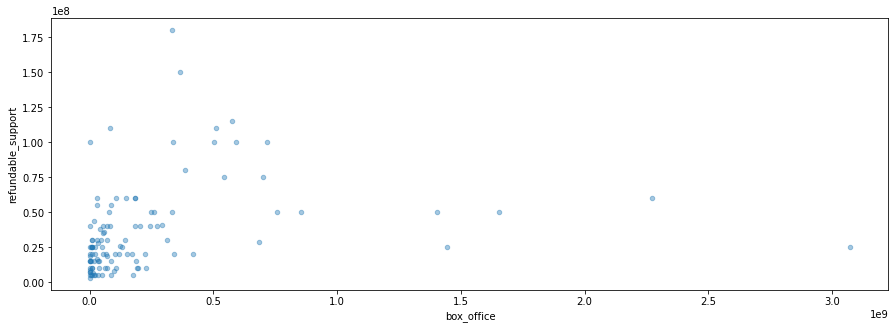

In [62]:
df_ref_supp.plot(x='box_office', y='refundable_support', kind='scatter', alpha=0.4, figsize=(15, 5));

Проверим, есть ли зависимость между кассовым сбором в прокате и выделяемыми возвратными средствами.  
На графике видим, что при разных суммах выделенных средств кассовые сборы остаются примерно одинаковыми, на уровне 0.3-0.9. Это говорит об отсутсвии зависимости между данными условиями.

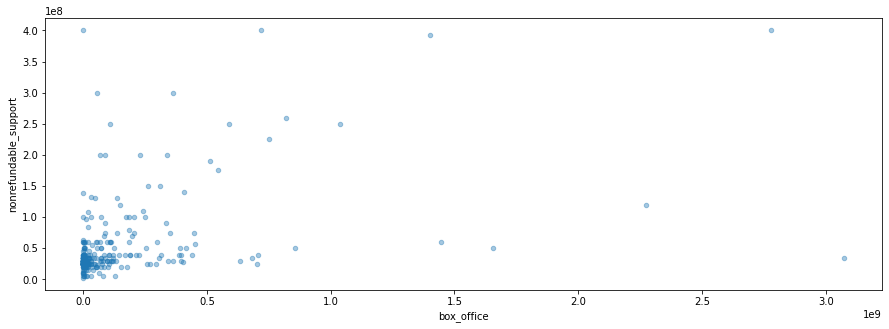

In [63]:
df_nonref_supp.plot(x='box_office', y='nonrefundable_support', kind='scatter', alpha=0.4, figsize=(15, 5));

Проверим, есть ли зависимость между кассовым сбором в прокате и выделяемыми невозвратными средствами.  
График показывает много значений с разной суммой невозвратных средств с одинаковыми примерно кассовыми сборами, что говорит об отсутсвии зависимости.

### Шаг 5. Напишите общий вывод

Было проведено исследование по изучению российского рынка кинопроката.  
Исходные данные: информация о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информация с о рейтингах фильмов.  
  
Перед проведением исследования мы составили следующие гипотезы:

Гипотеза 1: бюджет фильма влияет на количество выделяем возвратных и невозвратных средств;
Гипотеза 2: количество выделяемых средств влияет на рейтинг фильма;
Гипотеза 3: количество выделяемых возвратных и невозвратных средств влияет на кассовые сборы.  
  
  В результате нашего исследования удалось найти следующие зависимости:
Гипотеза 1. Данная гипотеза подтверждается полностью. Действительно мы видим, что чем больше запланированный бюджет фильма, тем больше объем средств. Наши данные показывают зависимость между бюджетом и возвратными и невозвратными средствами поддержки от государства, причём зависимость в отношении невозвртаных средств выше.

Гипотеза 2.
Данная гипотеза не подтверждается. Мы видим, что от увеличения количества возвратных и невозвратных средств поддержки государства рейтинг фильмов не увеличивается.

Гипотеза 3.
Данная гипотеза не подтверждается. Мы видим, что от увеличения количества возвратных и невозвратных средств поддержки государства кассовые сборы фильмов не растут, соответсвенно мы можем утвержать что есть другой фактор влияния.

Выводы: по результатам исследования можем сказать, что наибольшую поддержку получают фильмы с большим бюджетом, однако такие фильмы не получают высокую оценку зрителей и не приносят больших кассовых сборов.

Рекомендация: провести дополнительное исследование по изучению вкусовых предпочтений зрителя, чтобы инвестировать государсвенную поддержку в фильмы нужные зрителю.

---